In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/ufi.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/vfl.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/sohu.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/rdcm.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/virt.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/hylb.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/skt.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/asix.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/mac.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/gut.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/ngs.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/vpg.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/ibtx.us.txt
/kaggle/input/price-volume-data-for-all-us-st

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
import os
import random

# Load the stock data
stock1 = pd.read_csv('/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/a.us.txt', parse_dates=['Date'], index_col='Date')
stock2 = pd.read_csv('/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/aa.us.txt', parse_dates=['Date'], index_col='Date')

In [4]:
stock1.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1999-11-18,30.713,33.754,27.002,29.702,66277506,0
1999-11-19,28.986,29.027,26.872,27.257,16142920,0
1999-11-22,27.886,29.702,27.044,29.702,6970266,0
1999-11-23,28.688,29.446,27.002,27.002,6332082,0
1999-11-24,27.083,28.309,27.002,27.717,5132147,0


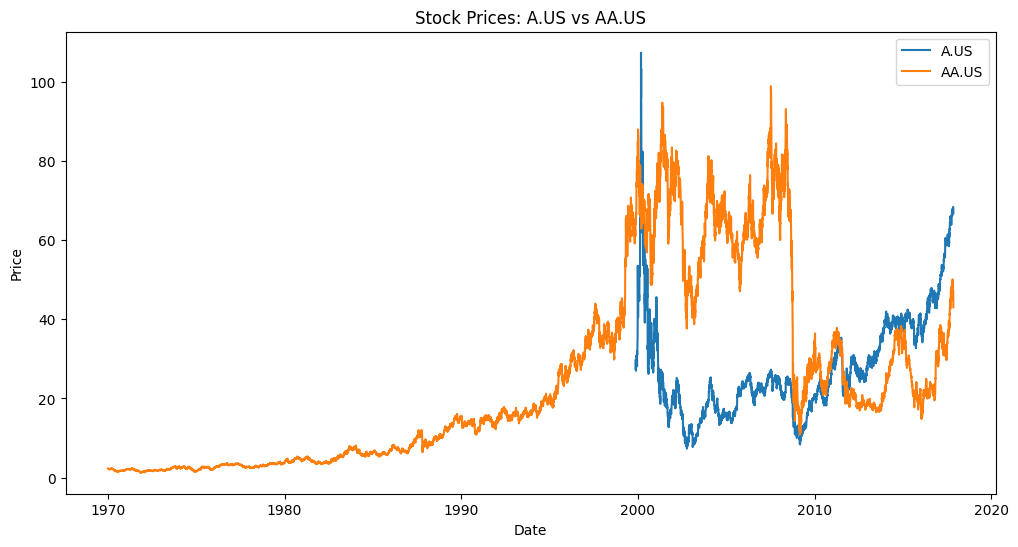

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(stock1['Close'], label='A.US')
plt.plot(stock2['Close'], label='AA.US')
plt.title('Stock Prices: A.US vs AA.US')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

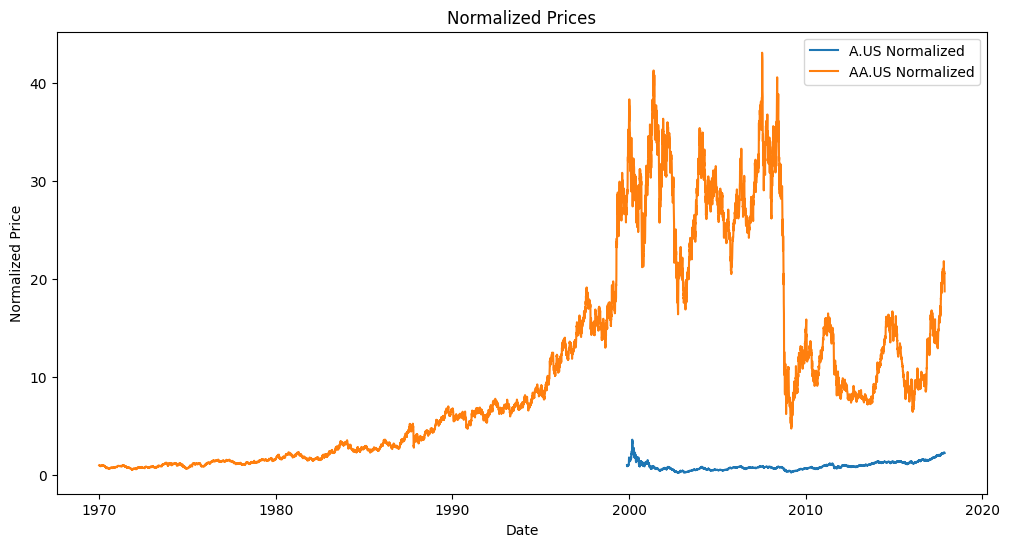

In [6]:
# Normalize the prices
stock1_norm = stock1['Close'] / stock1['Close'].iloc[0]
stock2_norm = stock2['Close'] / stock2['Close'].iloc[0]

# Plot normalized prices
plt.figure(figsize=(12, 6))
plt.plot(stock1_norm, label='A.US Normalized')
plt.plot(stock2_norm, label='AA.US Normalized')
plt.title('Normalized Prices')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

In [7]:
# Align the two normalized price series
stock1_norm_aligned, stock2_norm_aligned = stock1_norm.align(stock2_norm, join='inner')

# Drop any remaining NaN values
stock1_norm_aligned = stock1_norm_aligned.dropna()
stock2_norm_aligned = stock2_norm_aligned.dropna()

# Check the lengths of the aligned series
print(f"Length of A.US: {len(stock1_norm_aligned)}")
print(f"Length of AA.US: {len(stock2_norm_aligned)}")

# Perform the cointegration test
score, p_value, _ = coint(stock1_norm_aligned, stock2_norm_aligned)
print(f'Cointegration Test P-value: {p_value}')

# Check if the pair is cointegrated
if p_value < 0.05:
    print("The stock pair is cointegrated and suitable for pairs trading.")
else:
    print("The stock pair is not cointegrated. Try another pair.")

Length of A.US: 4520
Length of AA.US: 4520
Cointegration Test P-value: 0.745789914265429
The stock pair is not cointegrated. Try another pair.


In [8]:
# Get the list of all stock files
file_paths = []
for dirname, _, filenames in os.walk('/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks'):
    for filename in filenames:
        if filename.endswith('.txt') or filename.endswith('.csv'):  # Only get valid file extensions
            file_path = os.path.join(dirname, filename)
            # Check if file is not empty
            if os.path.getsize(file_path) > 0:
                file_paths.append(file_path)

# Display total number of valid files
print(f"Total number of non-empty stock files: {len(file_paths)}")

if len(file_paths) < 200:
    print("Error: Not enough valid files found")
else:
    # Randomly select 100 pairs of stocks
    random_pairs = random.sample(file_paths, 200)  # We need 200 files to create 100 pairs
    stock_pairs = [(random_pairs[i], random_pairs[i+1]) for i in range(0, 200, 2)]
    
    # List to store results
    cointegrated_pairs = []
    
    # Loop through each pair and perform cointegration test
    for stock1_path, stock2_path in stock_pairs:
        try:
            # Try to read files and check if they have content
            try:
                stock1 = pd.read_csv(stock1_path, parse_dates=['Date'], index_col='Date')
                stock2 = pd.read_csv(stock2_path, parse_dates=['Date'], index_col='Date')
            except EmptyDataError:
                print(f"Empty file found: {stock1_path} or {stock2_path}")
                continue
            except Exception as e:
                print(f"Error reading files: {stock1_path} or {stock2_path}, Error: {str(e)}")
                continue
            
            # Check if DataFrames have data
            if stock1.empty or stock2.empty:
                print(f"Empty DataFrame: {stock1_path} or {stock2_path}")
                continue
                
            # Keep only the 'Close' price
            if 'Close' not in stock1.columns or 'Close' not in stock2.columns:
                print(f"Missing 'Close' column in {stock1_path} or {stock2_path}")
                continue
                
            stock1_close = stock1['Close']
            stock2_close = stock2['Close']
            
            # Align the data by date
            stock1_close, stock2_close = stock1_close.align(stock2_close, join='inner')
            
            # Drop NaN values
            stock1_close = stock1_close.dropna()
            stock2_close = stock2_close.dropna()
            
            # Check if the lengths are sufficient
            if len(stock1_close) < 100 or len(stock2_close) < 100:
                continue
                
            # Normalize the prices
            stock1_norm = stock1_close / stock1_close.iloc[0]
            stock2_norm = stock2_close / stock2_close.iloc[0]
            
            # Perform the cointegration test
            score, p_value, _ = coint(stock1_norm, stock2_norm)
            
            # If the p-value is below 0.05, the pair is cointegrated
            if p_value < 0.05:
                cointegrated_pairs.append((stock1_path, stock2_path, p_value))
                print(f"Cointegrated Pair Found: {stock1_path} and {stock2_path} with p-value {p_value:.4f}")
                
        except Exception as e:
            print(f"Error processing pair: {stock1_path} and {stock2_path}, Error: {str(e)}")
            continue

    # Convert results to DataFrame for easier analysis
    results_df = pd.DataFrame(cointegrated_pairs, columns=['Stock 1', 'Stock 2', 'P-Value'])
    
    # Display the results
    if not results_df.empty:
        print(f"\nNumber of cointegrated pairs found: {len(results_df)}")
        display(results_df)
    else:
        print("No cointegrated pairs found.")

Total number of non-empty stock files: 7163
Cointegrated Pair Found: /kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/ari_c.us.txt and /kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/xog.us.txt with p-value 0.0018
Cointegrated Pair Found: /kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/prss.us.txt and /kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/sol.us.txt with p-value 0.0000
Cointegrated Pair Found: /kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/fpi.us.txt and /kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/slp.us.txt with p-value 0.0141
Cointegrated Pair Found: /kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/scsc.us.txt and /kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/ctg.us.txt with p-value 0.0319
Cointegrated Pair Found: /kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/blin.us.txt and /kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/lcut.us

,Stock 1,Stock 2,P-Value
0,/kaggle/input/price-volume-data-for-all-us-sto...,/kaggle/input/price-volume-data-for-all-us-sto...,0.001777
1,/kaggle/input/price-volume-data-for-all-us-sto...,/kaggle/input/price-volume-data-for-all-us-sto...,0.000018
2,/kaggle/input/price-volume-data-for-all-us-sto...,/kaggle/input/price-volume-data-for-all-us-sto...,0.014073
3,/kaggle/input/price-volume-data-for-all-us-sto...,/kaggle/input/price-volume-data-for-all-us-sto...,0.031941
4,/kaggle/input/price-volume-data-for-all-us-sto...,/kaggle/input/price-volume-data-for-all-us-sto...,0.001110
5,/kaggle/input/price-volume-data-for-all-us-sto...,/kaggle/input/price-volume-data-for-all-us-sto...,0.004684
6,/kaggle/input/price-volume-data-for-all-us-sto...,/kaggle/input/price-volume-data-for-all-us-sto...,0.000008


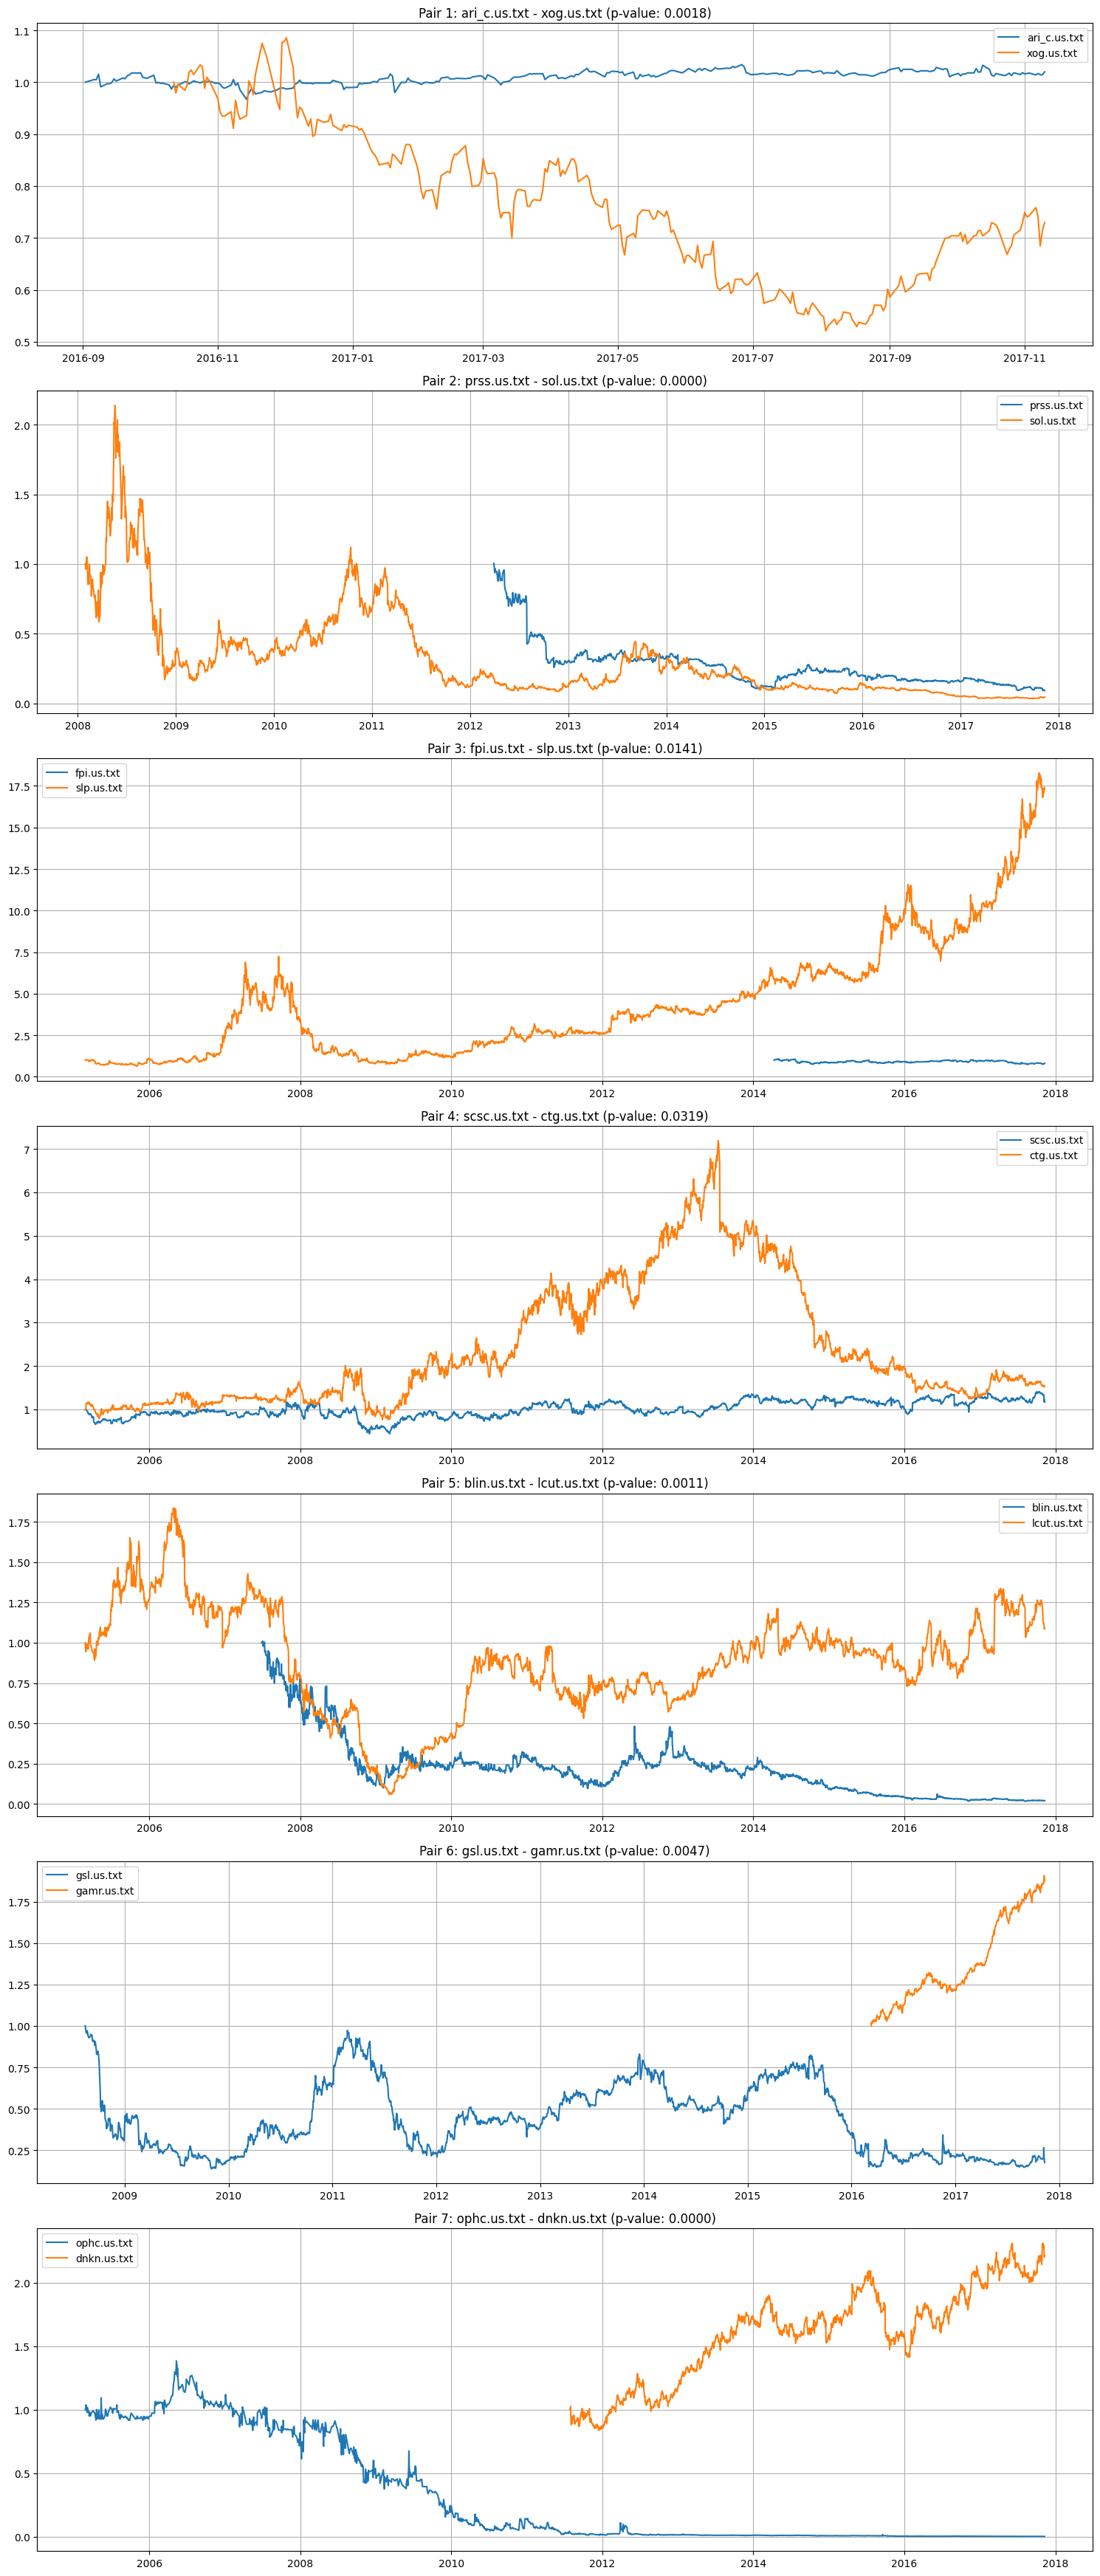


Summary of Cointegrated Pairs:
--------------------------------------------------
Pair 1: ari_c.us.txt - xog.us.txt
P-value: 0.0018
--------------------------------------------------
Pair 2: prss.us.txt - sol.us.txt
P-value: 0.0000
--------------------------------------------------
Pair 3: fpi.us.txt - slp.us.txt
P-value: 0.0141
--------------------------------------------------
Pair 4: scsc.us.txt - ctg.us.txt
P-value: 0.0319
--------------------------------------------------
Pair 5: blin.us.txt - lcut.us.txt
P-value: 0.0011
--------------------------------------------------
Pair 6: gsl.us.txt - gamr.us.txt
P-value: 0.0047
--------------------------------------------------
Pair 7: ophc.us.txt - dnkn.us.txt
P-value: 0.0000
--------------------------------------------------


In [9]:
# Create a subplot for all cointegrated pairs
n_pairs = len(cointegrated_pairs)
fig, axes = plt.subplots(n_pairs, 1, figsize=(15, 5*n_pairs))

# If only one pair is found, wrap axes in a list for consistent indexing
if n_pairs == 1:
    axes = [axes]

# Plot each cointegrated pair
for i, (stock1_path, stock2_path, p_value) in enumerate(cointegrated_pairs):
    # Load and prepare the data
    stock1 = pd.read_csv(stock1_path, parse_dates=['Date'], index_col='Date')
    stock2 = pd.read_csv(stock2_path, parse_dates=['Date'], index_col='Date')
    
    # Get stock names
    stock1_name = os.path.basename(stock1_path).replace('.csv', '')
    stock2_name = os.path.basename(stock2_path).replace('.csv', '')
    
    # Normalize and plot the closing prices
    stock1_norm = stock1['Close'] / stock1['Close'].iloc[0]
    stock2_norm = stock2['Close'] / stock2['Close'].iloc[0]
    
    # Plot on the corresponding subplot
    axes[i].plot(stock1_norm.index, stock1_norm, label=stock1_name)
    axes[i].plot(stock2_norm.index, stock2_norm, label=stock2_name)
    
    # Add title and legend
    axes[i].set_title(f'Pair {i+1}: {stock1_name} - {stock2_name} (p-value: {p_value:.4f})')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary of Cointegrated Pairs:")
print("-" * 50)
for i, (stock1_path, stock2_path, p_value) in enumerate(cointegrated_pairs):
    stock1_name = os.path.basename(stock1_path).replace('.csv', '')
    stock2_name = os.path.basename(stock2_path).replace('.csv', '')
    print(f"Pair {i+1}: {stock1_name} - {stock2_name}")
    print(f"P-value: {p_value:.4f}")
    print("-" * 50)

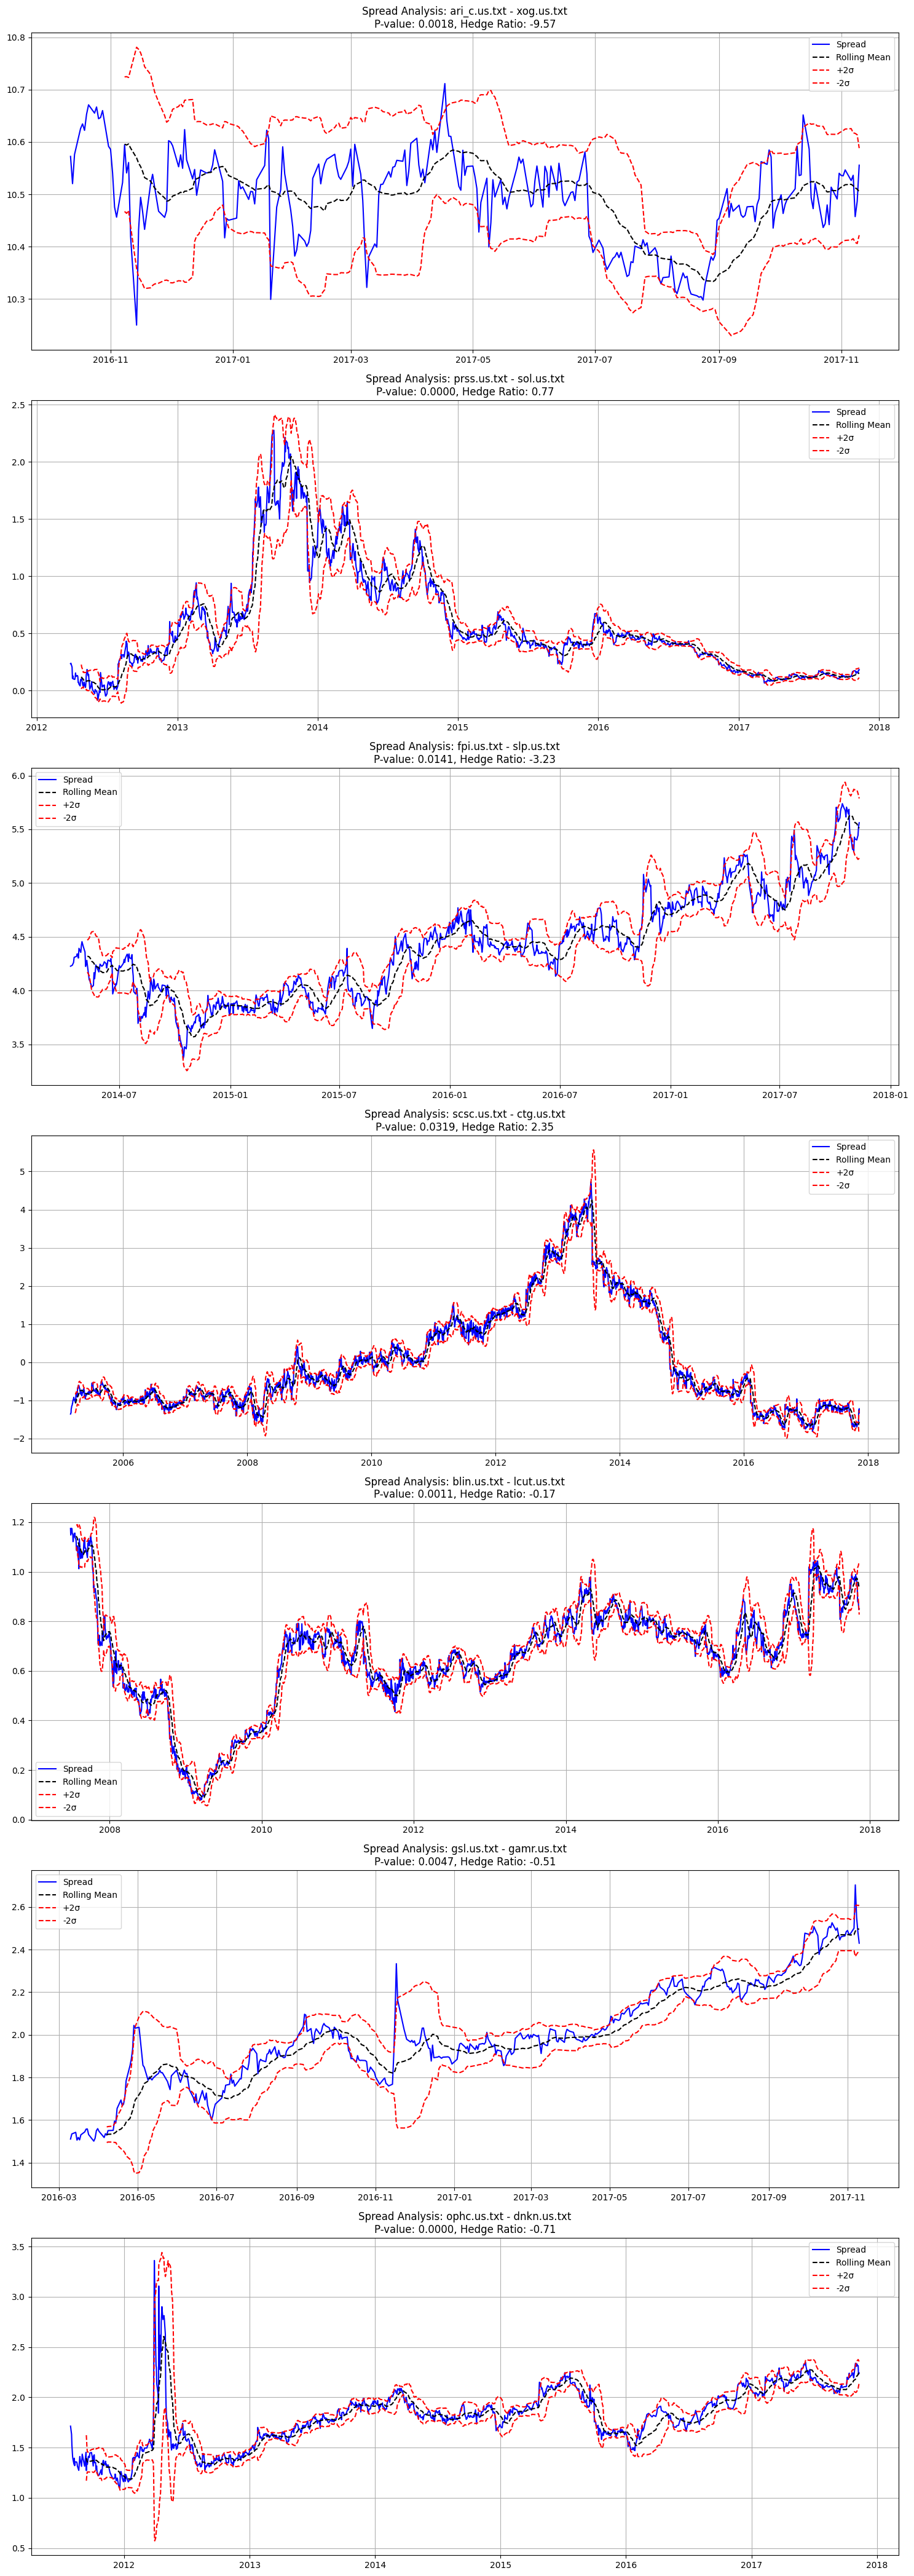


Spread Analysis Summary:
--------------------------------------------------------------------------------

Pair: ari_c.us.txt - xog.us.txt
Hedge Ratio: -9.5725
Rolling Mean: 10.5051
Rolling Std Dev: 0.0416
Current Spread: 10.5557
Current Z-score: 1.2168
--------------------------------------------------------------------------------

Pair: prss.us.txt - sol.us.txt
Hedge Ratio: 0.7657
Rolling Mean: 0.1550
Rolling Std Dev: 0.0214
Current Spread: 0.1815
Current Z-score: 1.2398
--------------------------------------------------------------------------------

Pair: fpi.us.txt - slp.us.txt
Hedge Ratio: -3.2262
Rolling Mean: 5.5100
Rolling Std Dev: 0.1387
Current Spread: 5.5612
Current Z-score: 0.3693
--------------------------------------------------------------------------------

Pair: scsc.us.txt - ctg.us.txt
Hedge Ratio: 2.3549
Rolling Mean: -1.5599
Rolling Std Dev: 0.1497
Current Spread: -1.2190
Current Z-score: 2.2762
--------------------------------------------------------------------

In [10]:
# Create subplots for spread analysis
n_pairs = len(cointegrated_pairs)
fig, axes = plt.subplots(n_pairs, 1, figsize=(15, 6*n_pairs))
# If only one pair is found, wrap axes in a list for consistent indexing
if n_pairs == 1:
    axes = [axes]
# Analyze and plot spread for each pair
spread_stats = []
lookback_period = 20  # Rolling window for statistics

for i, (stock1_path, stock2_path, p_value) in enumerate(cointegrated_pairs):
    # Load the stock data
    stock1 = pd.read_csv(stock1_path, parse_dates=['Date'], index_col='Date')
    stock2 = pd.read_csv(stock2_path, parse_dates=['Date'], index_col='Date')
    
    # Get stock names
    stock1_name = os.path.basename(stock1_path).replace('.csv', '')
    stock2_name = os.path.basename(stock2_path).replace('.csv', '')
    
    # Align the dates between both stocks
    stock1_close = stock1['Close']
    stock2_close = stock2['Close']
    stock1_close, stock2_close = stock1_close.align(stock2_close, join='inner')
    
    # Calculate normalized prices
    stock1_norm = stock1_close / stock1_close.iloc[0]
    stock2_norm = stock2_close / stock2_close.iloc[0]
    
    # Calculate hedge ratio using linear regression
    hedge_ratio = np.polyfit(stock1_norm, stock2_norm, 1)[0]
    
    # Calculate spread using hedge ratio
    spread = stock2_norm - (hedge_ratio * stock1_norm)
    
    # Calculate rolling statistics
    rolling_mean = spread.rolling(window=lookback_period).mean()
    rolling_std = spread.rolling(window=lookback_period).std()
    z_score = (spread - rolling_mean) / rolling_std
    
    # Store statistics
    spread_stats.append({
        'Pair': f'{stock1_name} - {stock2_name}',
        'Hedge Ratio': hedge_ratio,
        'Mean': rolling_mean.iloc[-1],
        'Std Dev': rolling_std.iloc[-1],
        'Current Z-score': z_score.iloc[-1],
        'Current Spread': spread.iloc[-1]
    })
    
    # Plot spread and rolling bands
    axes[i].plot(spread.index, spread, label='Spread', color='blue')
    axes[i].plot(rolling_mean.index, rolling_mean, label='Rolling Mean', color='black', linestyle='--')
    axes[i].plot(rolling_mean.index, rolling_mean + 2*rolling_std, color='red', linestyle='--', label='+2σ')
    axes[i].plot(rolling_mean.index, rolling_mean - 2*rolling_std, color='red', linestyle='--', label='-2σ')
    
    # Add title and legend
    axes[i].set_title(f'Spread Analysis: {stock1_name} - {stock2_name}\nP-value: {p_value:.4f}, Hedge Ratio: {hedge_ratio:.2f}')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Print spread analysis results
print("\nSpread Analysis Summary:")
print("-" * 80)
for stats in spread_stats:
    print(f"\nPair: {stats['Pair']}")
    print(f"Hedge Ratio: {stats['Hedge Ratio']:.4f}")
    print(f"Rolling Mean: {stats['Mean']:.4f}")
    print(f"Rolling Std Dev: {stats['Std Dev']:.4f}")
    print(f"Current Spread: {stats['Current Spread']:.4f}")
    print(f"Current Z-score: {stats['Current Z-score']:.4f}")
    print("-" * 80)

# Trading signals based on z-scores with position sizes
print("\nPotential Trading Signals:")
print("-" * 80)
for stats in spread_stats:
    z_score = stats['Current Z-score']
    hedge_ratio = stats['Hedge Ratio']
    print(f"\nPair: {stats['Pair']}")
    
    if z_score > 2:
        print("Signal: SHORT spread")
        print(f"  - Short Stock1: {-1.0:.2f} units")
        print(f"  - Long Stock2: {hedge_ratio:.2f} units")
        print(f"Z-score: {z_score:.2f} > 2")
    elif z_score < -2:
        print("Signal: LONG spread")
        print(f"  - Long Stock1: {1.0:.2f} units")
        print(f"  - Short Stock2: {-hedge_ratio:.2f} units")
        print(f"Z-score: {z_score:.2f} < -2")
    else:
        print("Signal: No clear")